In [39]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import keras
import sys

In [2]:
# Uncomment the following lines to print version of Python and Keras
# print("Python version: {} ".format(sys.version))
# print(" Keras version: {} ".format(keras.__version__))


In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [4]:
# Lets determine the dataset characterstics

print("Training Images: {} ".format(X_train.shape))
print("Test Images: {} ".format(X_test.shape))

Training Images: (50000, 32, 32, 3) 
Test Images: (10000, 32, 32, 3) 


In [5]:
# For single image
print(X_train[0].shape)

(32, 32, 3)


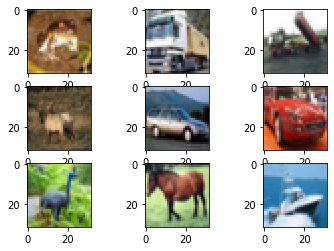

In [6]:
# Create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot( i  +330 + 1)
    img = X_train[i].transpose([0,1,2])
    # Create the image to subplot
    plt.imshow(img)

# Show the plot
plt.show()

# We get 9 image (blurry because they are 32x32 pixels)

In [7]:
# Fix Random seed for reproducability
seed = 6 
np.random.seed(seed)

# Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalise the input from 0 to 255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0




In [8]:
print(X_train[0])

[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [9]:
# Class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [10]:
# [6] = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

# Hot encode the ouputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

num_class = Y_test.shape[1]

print("Y_train shape: {} ".format(Y_train.shape))
print("Y_train  first element: {} ".format(Y_train[0]))

Y_train shape: (50000, 10) 
Y_train  first element: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 


In [11]:
# Import necessary layers

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD



In [12]:
# Define a model function
def allcnn(weights = None):
    # Define the model type
    model = Sequential()
    
    # Add convolutional layers
    model.add(Conv2D(96, (3,3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3), padding = 'same', strides = (2, 2)))

    # Dropout helps model generalise, so that features are spreadout entire network, handle new data better and avoid over fitting
    model.add(Dropout(0.5))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))             
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same', strides = (2, 2)))
    
    model.add(Dropout(0.5))       
              
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
              
    model.add(Conv2D(192, (1,1), padding = 'valid'))              
    model.add(Activation('relu'))
              
    model.add(Conv2D(10, (1,1), padding = 'valid'))             

    # Add global average pooling layer with softMax              
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
              
        
    # Load the weights
    if weights:
        model.load_weights(weights)
        
    # Return Sequential model, add layers as mentioned above, load weights if added and return 
    return model

In [14]:
# Define Hyper Parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build Model
model = allcnn()


# Define optimiser and compile the model
sgd = SGD(lr = learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

# Print Model Summary
print (model.summary())

# Define additional training parameters 

epochs = 350
batch_size = 32
########## ########## ########## ########## Run This On A GPU ########## ########## ########## ########## 

# Fit the model 
# model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = epochs, batch_size = batch_size, verbose =2)

########## ########## ########## ########## ########## ########## ########## ########## ########## ######

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)      

In [15]:
# Define Hyper Parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# Build Model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)


# Define optimiser and compile the model
sgd = SGD(lr = learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

# Print Model Summary
print (model.summary())

# Test the modelwith the pretrained weights
scores = model.evaluate(X_test, Y_test, verbose = 1)
print("Accuracy: {} ".format(scores[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 192)      

In [17]:
# Make a dict for class labels and names 
classes = range(0, 10)
names = ['aeroplane', 'automobile', 'bird', 'cat', 'dog', 'frog', 'horse', 'ship', 'truck']

# Zip the names and classes to make a dict of class labels
class_labels = dict(zip(classes, names))

print("Class Labels are: {}".format(class_labels))

Class Labels are: {0: 'aeroplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'dog', 5: 'frog', 6: 'horse', 7: 'ship', 8: 'truck'}


In [35]:
# Generate batch of 9 images to predict

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

# Make predictions 
predictions = model.predict(batch, verbose=1)

9/9 [==============================] - 0s 12ms/step


In [36]:
# Print Predictions
print(predictions.shape)
for image in predictions:
    print(np.sum(image))

(9, 10)
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [37]:
# Convert class probabilities to class labels
class_result = np.argmax(predictions, axis=1)
print("Class Result is: {} ".format(class_result))

Class Result is: [4 5 6 3 1 1 3 6 8] 


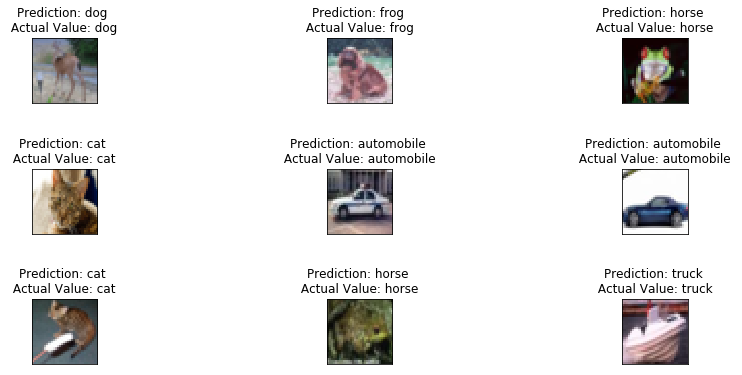

In [38]:
# Create a grid of 3x3 images
fig, axs = plt.subplots(3,3, figsize = (15,6))
fig.subplots_adjust(hspace =1 )
axs = axs.flatten()

for i, img in enumerate(batch):
    
    # Determine label for each prediction, set_title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = "Prediction: {} \n Actual Value: {} ".format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

    # Plot the image
    axs[i].imshow(img.transpose([0,1,2]))
            
# Show the plot
plt.show()

    